In [1]:
import numpy as np
from itertools import combinations

In [2]:
from collections import deque
from matplotlib import pyplot as plt
import Field
import Game
import Agent
import Cards
from utils import * 
from importlib import reload
from random import choice, shuffle

reload(Field)
reload(Game)
reload(Agent)
reload(Cards)

<module 'Cards' from '/home/clark/Apps/durakula/game/Cards.py'>

In [3]:
numplayers = 4
durak_game = Game.DurakGame(numplayers, 'small')

In [28]:
for p in durak_game.players:
    print(p.player_mode)

MODE_DEFEND
MODE_ATTACK
MODE_ATTACK
MODE_ATTACK


In [29]:
print(durak_game.playing_field)

--- Playing Field ---
Drawing DurakDeck: --- Card Collection ---
Cards: D3,C7,S0,C5,S3,D5,D2,H2,S5,H1,H8,H5.
Size: 12
-----------------------

0:--- Card Collection ---
Cards: H0,S1,S2,S4,S7.
Size: 5
-----------------------

1:--- Card Collection ---
Cards: D0,D1,D8,C1,C8,H6.
Size: 6
-----------------------

2:--- Card Collection ---
Cards: D4,C4,C6,H3,H7,S6.
Size: 6
-----------------------

3:--- Card Collection ---
Cards: D6,C0,C2,C3,H4.
Size: 5
-----------------------

Trump suit is Hearts
---------------------



In [30]:
durak_game.playing_field.first_attack

False

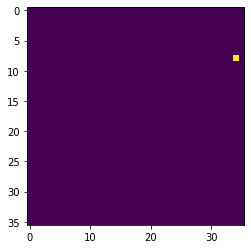

In [31]:
plt.imshow(durak_game.playing_field.field)

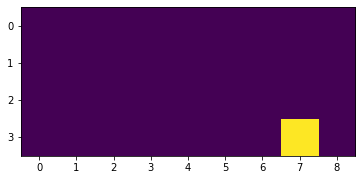

In [32]:
plt.imshow(durak_game.playing_field.attack_buffer)

In [33]:
players_on_attack = [p.player_id for p in durak_game.playing_field.attack_players()]
p_att_idx = players_on_attack[0]
print(durak_game.players[p_att_idx].get_deck_from_hand())

--- Card Collection ---
Cards: D0,D1,D8,C1,C8,H6.
Size: 6
-----------------------



In [34]:
p_def_idx = durak_game.playing_field.defend_player().player_id
print(durak_game.players[p_def_idx].get_deck_from_hand())

--- Card Collection ---
Cards: H0,S1,S2,S4,S7.
Size: 5
-----------------------



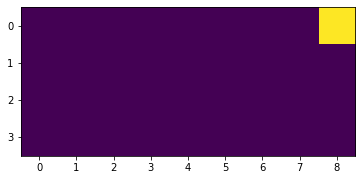

In [35]:
plt.imshow(durak_game.players[p_def_idx].buffer)

In [36]:
attack_moves = durak_game.playing_field.get_legal_moves(p_att_idx)
attack_moves

[((1, 8),), ((3, 8),), ((1, 8), (3, 8)), ()]

In [37]:
random_move = choice(durak_game.playing_field.get_legal_moves(p_att_idx))
print(random_move)

((1, 8),)


In [38]:
durak_game.get_next_state(random_move, p_att_idx)

(<Field.DurakField at 0x7f0ac406ac10>, 0)

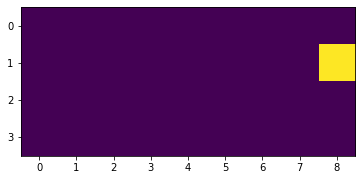

In [39]:
plt.imshow(durak_game.playing_field.attacks)

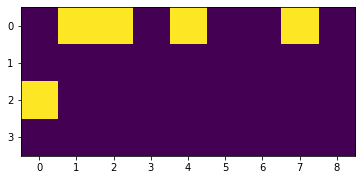

In [40]:
plt.imshow(durak_game.players[p_def_idx].hand)

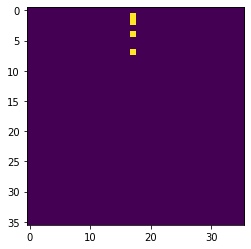

In [41]:
player = durak_game.players[p_def_idx]
attack_idxs = np.flatnonzero(durak_game.playing_field.attacks)
n_vals = durak_game.playing_field.n_vals
n_suits = durak_game.playing_field.n_suits
nontrump_attack_idxs = attack_idxs[attack_idxs >= n_vals]
valid_defenses = np.zeros_like(durak_game.playing_field.field)
f = lambda x : (x // n_vals + 1)*n_vals

for att_idx in attack_idxs:
    valid_defenses[att_idx + 1 : f(att_idx), att_idx] = 1
for att_idx in nontrump_attack_idxs:
    valid_defenses[:n_vals, att_idx] = 1
    
if durak_game.playing_field.first_attack:
    valid_defenses[att_idx % n_vals : att_idx % n_vals + n_suits*n_vals : n_vals, att_idx] = 1

valid_defenses *= player.hand.ravel()[:,np.newaxis]
plt.imshow(valid_defenses)

In [42]:
defend_actions = durak_game.playing_field.get_legal_moves(p_def_idx)
print(defend_actions)

['ACTION_GIVEUP', ((1, 17),), ((2, 17),), ((4, 17),), ((7, 17),)]


In [43]:
random_defend = choice(defend_actions)
print(random_defend)
# random_defend = 'ACTION_GIVEUP'

((7, 17),)


In [44]:
durak_game.players[p_def_idx].buffer

array([[0, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0]])

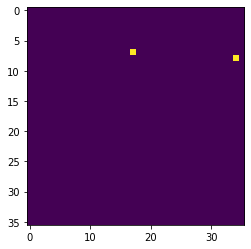

In [45]:
durak_game.get_next_state(random_defend, p_def_idx)
plt.imshow(durak_game.playing_field.field)

In [46]:
for p in durak_game.players:
    print(p.player_mode)

MODE_DEFEND
MODE_ATTACK
MODE_ATTACK
MODE_ATTACK


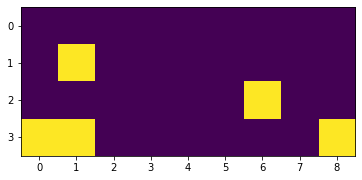

In [47]:
plt.imshow(durak_game.players[p_att_idx].hand)

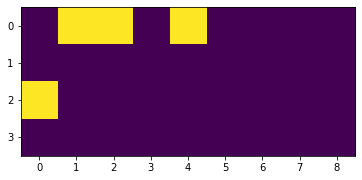

In [48]:
plt.imshow(durak_game.players[p_def_idx].hand)

In [49]:
durak_game.playing_field.field_active

True